In [1]:
import automol

re_smi = ("[CH2]CCC1CO1",)
pr_smi = ("[CH2]C1CO1", "C=C")

rxns = automol.reac.from_smiles(re_smi, pr_smi, stereo=False)

rxns

/Users/tee/Documents/Research/QM Simulations/Rotavera/propyl:1-ethyl-2-methyl Oxirane /Potential Energy Surfaces/PES Playground/.pixi/envs/default/lib/python3.13/site-packages/pandas/_libs/tslibs/__init__.py:40: InvalidTZPathWarning: Invalid paths specified in PYTHONTZPATH environment variable. Paths should be absolute but found the following relative paths:
    1-ethyl-2-methyl Oxirane /Potential Energy Surfaces/PES Playground/.pixi/envs/default/share/zoneinfo
    1-ethyl-2-methyl Oxirane /Potential Energy Surfaces/PES Playground/.pixi/envs/default/share/tzinfo
  from pandas._libs.tslibs.conversion import localize_pydatetime


(atoms:
   0: {symbol: C, implicit_hydrogens: 0, stereo_parity: null}
   1: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   2: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   3: {symbol: C, implicit_hydrogens: 0, stereo_parity: null}
   4: {symbol: C, implicit_hydrogens: 0, stereo_parity: null}
   5: {symbol: O, implicit_hydrogens: 0, stereo_parity: null}
   6: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   7: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   8: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   9: {symbol: C, implicit_hydrogens: 0, stereo_parity: null}
   10: {symbol: C, implicit_hydrogens: 0, stereo_parity: null}
   11: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   12: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   13: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
   14: {symbol: H, implicit_hydrogens: 0, stereo_parity: null}
 bonds:
   0-1: {order: 1, stereo_parity: null}
   0-2: {

In [2]:
(rxn,) = rxns

ts_graph = automol.reac.ts_graph(rxn)

ts_graph

({0: ('C', 0, None),
  1: ('H', 0, None),
  2: ('H', 0, None),
  3: ('C', 0, None),
  4: ('C', 0, None),
  5: ('O', 0, None),
  6: ('H', 0, None),
  7: ('H', 0, None),
  8: ('H', 0, None),
  9: ('C', 0, None),
  10: ('C', 0, None),
  11: ('H', 0, None),
  12: ('H', 0, None),
  13: ('H', 0, None),
  14: ('H', 0, None)},
 {frozenset({3, 4}): (1, None),
  frozenset({9, 10}): (1, None),
  frozenset({0, 3}): (1, None),
  frozenset({4, 5}): (1, None),
  frozenset({0, 1}): (1, None),
  frozenset({0, 2}): (1, None),
  frozenset({3, 6}): (1, None),
  frozenset({0, 10}): (0.9, None),
  frozenset({10, 13}): (1, None),
  frozenset({10, 14}): (1, None),
  frozenset({9, 11}): (1, None),
  frozenset({3, 5}): (1, None),
  frozenset({9, 12}): (1, None),
  frozenset({4, 8}): (1, None),
  frozenset({4, 7}): (1, None)})

### Expanding the stereoisomers

The best thing to do for a database is only store the canonical amchi (i.e. m0) and only run the calculations on canonical amchis

AMChI=1/C5H9O/c1-2-3-5-4-6-5/h5H,1-4H2/t5-/m0/s1/k3-2/r0


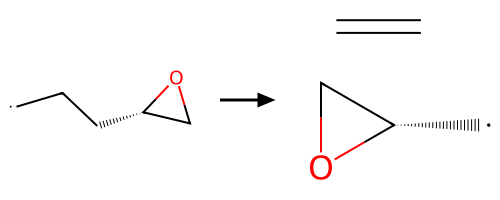

<class 'tuple'>


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

 15

C    1.588545  -0.459919  -1.754587
H    1.052795  -1.248535  -2.299620
H    2.661883  -0.645793  -1.962451
C    1.253409   0.885450  -2.301349
C    0.927162   1.048628  -3.768573
O   -0.090576   1.044311  -2.755014
H    1.703997   1.713122  -1.769364
H    0.987337   0.189268  -4.424608
H    1.142431   1.996083  -4.246303
C    2.249205   0.162986   0.634184
C    1.381313  -0.667387  -0.254932
H    2.958902   0.861652   0.223434
H    2.135495   0.122180   1.712729
H    0.348570  -0.595648   0.096651
H    1.713935  -1.709005  -0.106847


In [ ]:
for stereo_ts_graph in automol.graph.expand_stereo(ts_graph, enant=False):
    # Enant = false disables duplicate enantiomers
    amchi = automol.graph.amchi(stereo_ts_graph)
    print(amchi)

    automol.graph.display(stereo_ts_graph)
    geom = automol.graph.geometry(stereo_ts_graph)
    print(type(geom))
    automol.geom.display(geom, label=True)
    print(automol.geom.xyz_string(geom))
    # xyz = automol.geom.xyz_string(geom)


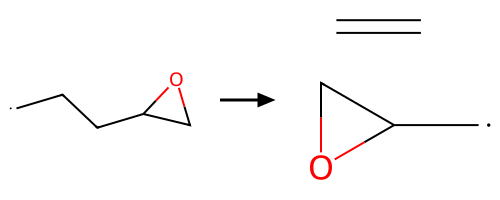

In [4]:
dct = {}

for i, rxn in enumerate(rxns):
    automol.reac.display(rxn)
    dct[i] = automol.reac.ts_amchi(rxn)

In [5]:
dct

{0: 'AMChI=1/C5H9O/c1-2-3-5-4-6-5/h5H,1-4H2/k3-2/r0'}